# Tutorial 5: Factor Analysis to Measure Tolerance
**Date**: March 2022

**Background**
In the previous tutorial, you assessed the reliability and validity of questionnaries. In this tutorial, you will peform an exploratory factor analysis (EFA) to measure tolerance on the following case-study.

**Case-Study on Tolerance**
The goal of this case-study is to examine the attitude of 150 students towards tolerance where tolerance refers to the degree of diversity. The researchers involved in this case-study developed eight questions to model various expressions of tolerance. The questions are provided below:


**Table 1**. Description of variables in the dataset

|id|variable   |description                                                                                                                                                     |
|------|-----------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1     |id         |annoymized unique identifier per individual                                                                                                                                                       |
|2     |age        |Age of student                                                                                                                                                                                                          |
|3     |height     |Height (scale in cm, e.g. 183)                                                                                                                                  |
|4     |country    |Where are you come from? (Country)                                                                                                                              |
|5     |language   |How many language you speak at home to your family?                                                                                                             |
|6     |freq_travel|How many different countries have you travelled to?                                                                                                                                                                   |
|7     |q1         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [People should have the right to live how they wish]|
|8    |q2         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [It is important that people have the freedom to live their life as they choose]     |
|9   |q3         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [ It is okay for people to live as they wish as long as they do not harm other people]                                    |
|10    |q4         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s beliefs and opinions]        |
|11    |q5         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s opinions even when I do not agree]   |
|12    |q6         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like to spend time with people who are different from me]                                         |
|13    |q7         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like people who challenge me to think about the world in a different way]                            |
|14   |q8         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [Society benefits from a diversity of traditions and lifestyles]                            |
                 |



The responses to the survey questions were recorded in the "tolerance survey dataset". 

The dataset is available here: https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester4/tutorial4/inputs/tolerance_survey_data.csv 


**Today's Objectives**

In today's tutorial, you will conduct an exploratory factor analysis (EFA) on the given dataset. The goal of the factor analyis is as follows:

- Conduct a Kaiser-Meyer-Olkin (KMO) test to assess the suitability of survey data (only items q1-q8) for factor analysis
- Find the appropriate number of Factors for the given survey items (only q1-q8)
- Interpret the factor loadings and find out which survey items/variables are related to which factors
- Compute the different types of variance to model the interrelationships among variables

**Intended Learning Outcomes**
- M5. Understand the fundamentals of factor analysis and identify opportunities to combine variables;

- M6. Conduct your own factor analysis in Python;


### Install the factor_analyzer package

#### For MacOS:
Type Command + Space Bar on your Mac Keyboard. Type in “Terminal”. Open the terminal.
Type `pip install factor_analyzer==0.3.2` and hit enter.
Restart the Kernel of your Jupyter Notebook. Now try to import: `from factor_analyzer import FactorAnalyzer` in a cell in Jupyter notebook.

#### For Windows:
Type “Anaconda prompt” in your window search option. Open the Anaconda Prompt.
Type `pip install factor_analyzer==0.3.2` and hit enter.
Restart the Kernel of your Jupyter Notebook. Now try to import: `from factor_analyzer import FactorAnalyzer` in a cell in Jupyter notebook.

#### For Colab
Run `!pip install factor_analyzer==0.3.2` in a Code cell. Now try to import: `from factor_analyzer import FactorAnalyzer` in a cell in the Colab notebook.


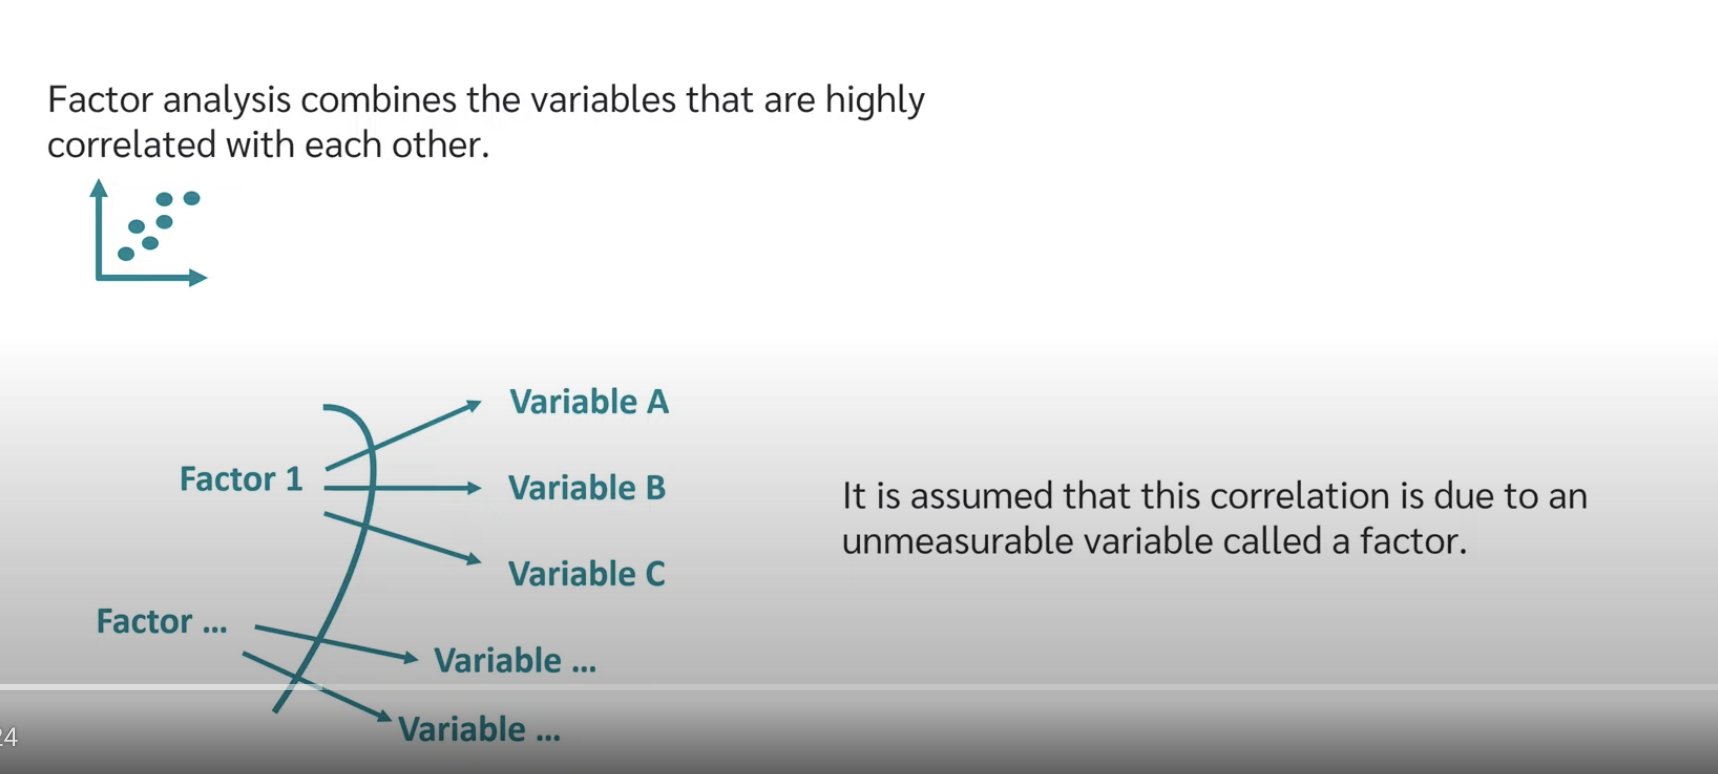

#### Import the necessary libraries you will need to perform factor analysis on the survey data.

In [1]:
!pip install factor_analyzer==0.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40378 sha256=75e4983f9d0bfee8152aa560766829886bcc45108c83996e8ef0d5fcb68f5f08
  Stored in directory: /Users/bill/Library/Caches/pip/wheels/62/16/01/acb71f0e0373c1369a2ce6f6977396cf11b779fe307d85fad5
Successfully built factor_analyzer


In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer #package for Exploratory Factor Analysis (EFA)

#### 0. Import the dataset
Read the csv file and store it in a dataframe named, `df`.

In [3]:
url = 'https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester4/tutorial4/inputs/tolerance_survey_data.csv'
df = pd.read_csv(url)

#### 1. Drop the columns: 'id' , 'age', 'height', 'country', 'language' and 'freq_travel' of `df`
For conducting factor analysis we are only interested in questions q1-q8 as they are related to tolerance. We are not interested in studying the attributes of respondents.

In [4]:
df = df.drop(['id','age','height','country','language','freq_travel'], axis=1)

#### 2. Transform the variables from the likert scale to the numbers by using the following mapping:

Strongly Agree ---> 5

Agree ---> 4

Neutral ---> 3

Disagree ---> 2

Strongly Disagree ---> 1

In [5]:
df_transformed = df.replace(['Strongly Agree',
                   'Agree', 
                   'Neutral', 
                   'Disagree', 
                   'Strongly Disagree'], [5,4,3,2,1])

#### 3. Print the first 10 rows of the transformed dataframe.

In [6]:
df_transformed.head(10)

,q1,q2,q3,q4,q5,q6,q7,q8
0,4.0,4,4.0,4.0,3,2.0,3.0,3.0
1,5.0,4,3.0,4.0,5,5.0,4.0,4.0
2,4.0,4,5.0,4.0,5,4.0,5.0,4.0
3,4.0,4,4.0,4.0,5,4.0,4.0,3.0
4,5.0,4,5.0,3.0,3,4.0,4.0,5.0
5,5.0,5,5.0,5.0,5,5.0,5.0,5.0
6,4.0,5,5.0,5.0,5,5.0,4.0,4.0
7,4.0,2,1.0,3.0,1,3.0,2.0,4.0
8,NaN,4,3.0,3.0,5,5.0,5.0,3.0
9,4.0,5,5.0,5.0,5,5.0,5.0,5.0


#### 4. Handle missing values

Compute the mean of all the columns (questions). Replace the missing values by the mean of that particular column. Check the dataframe to see if the missing values have been replaced by the mean or not ( to do this you can print the values of different columns, for instance for q1: `df_transformed.q1.values`

In [7]:
#Mean of all the columns
column_means = df_transformed.mean()
column_means

q1    3.798658
q2    4.046667
q3    4.073826
q4    4.476510
q5    4.313333
q6    4.268456
q7    4.060403
q8    4.120805
dtype: float64

In [8]:
#Replace missing values in each column by using the mean of that particular column
df_transformed = df_transformed.fillna(column_means)

In [9]:
#Print the values of column q1
df_transformed.q1.values

array([4.        , 5.        , 4.        , 4.        , 5.        ,
       5.        , 4.        , 4.        , 3.79865772, 4.        ,
       2.        , 4.        , 3.        , 4.        , 3.        ,
       5.        , 5.        , 4.        , 4.        , 4.        ,
       5.        , 4.        , 2.        , 5.        , 5.        ,
       5.        , 4.        , 5.        , 5.        , 5.        ,
       1.        , 5.        , 1.        , 3.        , 4.        ,
       3.        , 2.        , 3.        , 1.        , 5.        ,
       4.        , 4.        , 2.        , 4.        , 5.        ,
       5.        , 5.        , 4.        , 5.        , 5.        ,
       4.        , 4.        , 5.        , 2.        , 5.        ,
       4.        , 4.        , 5.        , 1.        , 4.        ,
       3.        , 4.        , 5.        , 5.        , 5.        ,
       3.        , 2.        , 4.        , 4.        , 2.        ,
       5.        , 4.        , 4.        , 3.        , 5.     

#### 5. Check the suitability of the data for Factor Analysis using Kaiser-Meyer-Olkin (KMO) test

Conduct a Kaiser-Meyer-Olkin (KMO) test to evaluate if the data is suitable for Factor Analysis or not. Interpret the results of the test.  

Check the documentation of the `calculate_kmo()` function here: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html?highlight=kmo#factor_analyzer.factor_analyzer.calculate_kmo  and use it to check the suitability of the transformed dataframe (without missing values) for factor analysis. 

Interpret the KMO value as per the table provided in the lecture and decide if the dataset is suitable to perform factor analysis or not ?

In [10]:
df_transformed.corr().style.background_gradient(cmap="Blues")

,q1,q2,q3,q4,q5,q6,q7,q8
q1,1.000000,0.503568,0.434025,0.209179,0.155458,0.147776,0.126557,0.067692
q2,0.503568,1.000000,0.484081,0.411058,0.377022,0.255870,0.173565,0.214375
q3,0.434025,0.484081,1.000000,0.338021,0.257888,0.304170,0.283716,0.297416
q4,0.209179,0.411058,0.338021,1.000000,0.526983,0.295219,0.224520,0.338423
q5,0.155458,0.377022,0.257888,0.526983,1.000000,0.175729,0.158038,0.145497
q6,0.147776,0.255870,0.304170,0.295219,0.175729,1.000000,0.474304,0.457530
q7,0.126557,0.173565,0.283716,0.224520,0.158038,0.474304,1.000000,0.503823
q8,0.067692,0.214375,0.297416,0.338423,0.145497,0.457530,0.503823,1.000000


In [11]:
from factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_transformed)
kmo_model

0.7660312853938587

The KMO value is between 0.70 and 0.79. Its a middling value so the data is suitable for factor analysis. 

#### 6. Conduct Exploratory Factor Analysis


In [12]:
#How many items are there in the survey ?
no_of_items = df_transformed.shape[1] # we have 8 questions = number of columns = the second parameter of df.shape
no_of_items

8

In [14]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=no_of_items, method='principal') # set number of factors to the number of items and method ='principal'
fa.fit(df_transformed)

/Users/bill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


FactorAnalyzer(method='principal', n_factors=8, rotation_kwargs={})

Initially, the number of factors are set to the number of survey items in the dataset. So, in our case that will be `no_of_items = 8`. However, all the factors do not provide useful information about the common variance shared by the different survey items. Therefore, we will use the criteria disscussed in the lecutre to choose the optimal number of factors. 

- 1. Retain all the factors that are above the eigen value of 1
- 2. Use the scree plot to determine the point of inflexion and the optimal number of factors. 

#### 7. Print the EigenValues for all the Factors. 

Go to the following documentation of the factor_analyzer package: https://factor-analyzer.readthedocs.io/en/latest/genindex.html . Find the function `get_eigenvalues()` and study its documentation. Apply the `get_eigenvalues()` function to print the eigen values of all the factors. 

In [15]:
ev, v = fa.get_eigenvalues()
ev

array([3.11314471, 1.40193139, 1.03747296, 0.56655641, 0.53834305,
       0.51209197, 0.44468797, 0.38577155])

#### 8. Make a scree plot using matplotlib
The x-axis should plot the number of factors. The y-axis should contain the corresponding eigen values. There should be a line connecting the points as illustrated in the lecture slides.

In [16]:
import matplotlib.pyplot as plt

# x-axis should print the number of factors (= no. of items so from 1 to 8)
#Use the range function to get numbers from 1 to 8. Check documentation of range() here: https://www.w3schools.com/python/ref_func_range.asp
x_axis = range(1,no_of_items+1,1)  #range(start, stop, step) # start =1 , stop = 9 (because we have 8 items)

# y-axis should contain the eigen values
y_axis = ev

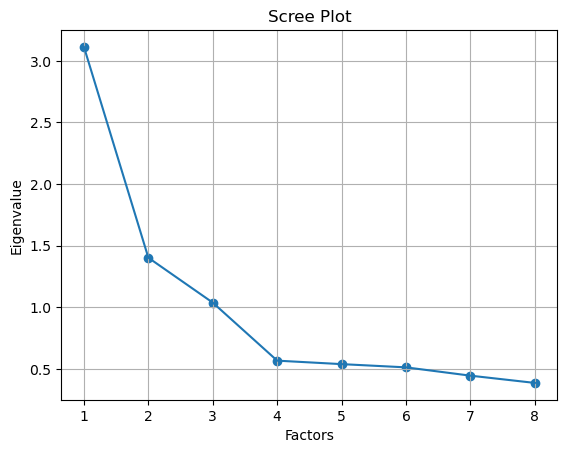

In [17]:
#Documentation: https://matplotlib.org/3.5.1/plot_types/index.html
        
#First make a scatter plot (just plot the points without the line)
plt.scatter(x_axis,y_axis)

#Then make a line plot connecting these points
plt.plot(x_axis,y_axis)

#Add a plot title
plt.title('Scree Plot')

# Add the lable for x-axis
plt.xlabel('Factors')

# Add the lable for y-axis
plt.ylabel('Eigenvalue')

#Add the grid lines (optional)
plt.grid()

#Show the plot
plt.show()

#### 9. How many factors will you choose depending on the eigen values and your interpretation of the scree plot?

Solution: The factors corresponding to the first 3 eigen values : 3.11314471, 1.40193139, 1.03747296 will be retained. So we will choose 3 factors. 

#### 10. Fit the Factor Analysis on the retained factors

Now lets fit the factor analysis model again on the number of retained factors to compute the factor loadings for each of the 8 survey items

Use the `FactorAnalyzer()` module and `fit()` function again to apply the new factor analysis model with the number of retained factors

In [18]:
# Put the n_factors equal to the number of factors retained
# set rotation = 'varimax' which is a type of orthogonal rotation
# set method = 'principal' for principal factor extraction method of exploratory factor analysis
no_of_retained_factors = 3
fa = FactorAnalyzer(n_factors = no_of_retained_factors , method='principal', rotation ='varimax') #default rotation is set to promax (oblique rotation)
fa.fit(df_transformed) 

/Users/bill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

#### 11. Print the factor loadings matrix. 
Use `fa.loadings_` to print the factor loadings matrix

In [19]:
fa.loadings_

array([[-0.00267823,  0.87722797, -0.00215512],
       [ 0.10867475,  0.72819156,  0.38797627],
       [ 0.31329976,  0.69996971,  0.17232898],
       [ 0.25423557,  0.19196361,  0.79433433],
       [ 0.03995455,  0.12465197,  0.87866445],
       [ 0.7532901 ,  0.16398369,  0.12234666],
       [ 0.81150932,  0.10234835,  0.03969787],
       [ 0.80139042,  0.04877754,  0.16263394]])

#### 12. Create a pandas DataFrame named, `df_loadings` from the Factor loading matrix. 
If you have retained m factors then the names of the columns of the DataFrame should be: Factor 0, Factor 1, ........ Factor m-1. So if m=3 then your column names are: Factor 0, Factor 1 and Factor 2

In [20]:
#Use the following syntax to create a DataFrame from an array. Put the correct values for the array_name, index and columns
# df_loadings = pd.DataFrame(array_name, index = put correct value here , columns = put correct value here ) 

df_loadings = pd.DataFrame(fa.loadings_,index=df_transformed.columns, columns =['Factor 0','Factor 1','Factor 2'])
df_loadings

,Factor 0,Factor 1,Factor 2
q1,-0.002678,0.877228,-0.002155
q2,0.108675,0.728192,0.387976
q3,0.313300,0.699970,0.172329
q4,0.254236,0.191964,0.794334
q5,0.039955,0.124652,0.878664
q6,0.753290,0.163984,0.122347
q7,0.811509,0.102348,0.039698
q8,0.801390,0.048778,0.162634


#### 13.Interpret the factor loadings 
1. Mention the most representative Factors (out of the retained Factors) for each survey item/question. Consider a threshold of above + 0.60 and below -0.60 for choosing the factor loadings.

2. Mention the most representative survey items which load onto each of the retained Factors. 


Factor 0 has highest loadings for Q6, Q7, Q8

Factor 1 has highest loadings for Q1, Q2, Q3

Factor 2 has the highest loadings for Q4 and Q5

#### 14. Communalities
Print the communalities for each of the survey items/questions.

Go to the following documentation of the factor_analyzer package: https://factor-analyzer.readthedocs.io/en/latest/genindex.html . Find the function `get_communalities()` and study its documentation. Apply the `get_communalities()` function to print the communalities.

In [19]:
fa.get_communalities()

array([0.76954073, 0.69259874, 0.61781162, 0.73245279, 0.7891857 ,
       0.60930534, 0.67059848, 0.67105566])

#### 15. Create a dataframe with one column and number of rows equal to the number of survey items to store the communalities for each survey item. 

In [20]:
df_communalitites = pd.DataFrame(fa.get_communalities(),index=df_transformed.columns, columns =['Communalities'])
df_communalitites

,Communalities
q1,0.769541
q2,0.692599
q3,0.617812
q4,0.732453
q5,0.789186
q6,0.609305
q7,0.670598
q8,0.671056


#### 16. Verifying if the communalities are the sum of squared factor loadings for the variables?

As mentioned in the lecture, communality can be defined as the sum of squared factor loadings for the variables. Use the `**` or `pow()` function to compute the sum of squared loadings for each survey item in the `df_loadings` dataframe. Store the values of the computed communalities in a column named `computed_communalities`. Verify that the values in the computed communalities column are similar to the ones in `df_communalities` column or not ?

Learn how to use the `pow()` and `**` operator here: https://kodify.net/python/math/exponents/

In [21]:
#Solution 1
df_loadings['communalities'] = df_loadings['Factor 0']**2 + df_loadings['Factor 1']**2 + df_loadings['Factor 2']**2
df_loadings

,Factor 0,Factor 1,Factor 2,communalities
q1,-0.002678,0.877228,-0.002155,0.769541
q2,0.108675,0.728192,0.387976,0.692599
q3,0.313300,0.699970,0.172329,0.617812
q4,0.254236,0.191964,0.794334,0.732453
q5,0.039955,0.124652,0.878664,0.789186
q6,0.753290,0.163984,0.122347,0.609305
q7,0.811509,0.102348,0.039698,0.670598
q8,0.801390,0.048778,0.162634,0.671056


In [22]:
#Solution 2
df_loadings['communalities_2'] = df_loadings['Factor 0'].pow(2) + df_loadings['Factor 1'].pow(2) + df_loadings['Factor 2'].pow(2)
df_loadings

,Factor 0,Factor 1,Factor 2,communalities,communalities_2
q1,-0.002678,0.877228,-0.002155,0.769541,0.769541
q2,0.108675,0.728192,0.387976,0.692599,0.692599
q3,0.313300,0.699970,0.172329,0.617812,0.617812
q4,0.254236,0.191964,0.794334,0.732453,0.732453
q5,0.039955,0.124652,0.878664,0.789186,0.789186
q6,0.753290,0.163984,0.122347,0.609305,0.609305
q7,0.811509,0.102348,0.039698,0.670598,0.670598
q8,0.801390,0.048778,0.162634,0.671056,0.671056


In [23]:
#Both solutions above are correct. Students can do any one. You can also demonstrate either solution to the students if they struggle.

#### 17. Variance in Factors
Use the `get_factor_variance()` function to calculate the factor variance information, including variance, proportional variance and cumulative variance for each factor. Refer to the documentation here: https://factor-analyzer.readthedocs.io/en/latest/genindex.html and find out how to use the `get_factor_variance()`


In [24]:
fa.get_factor_variance()

(array([2.04442617, 1.88188269, 1.62624019]),
 array([0.25555327, 0.23523534, 0.20328002]),
 array([0.25555327, 0.49078861, 0.69406863]))

Convert the above numpy array to a DataFrame, `df_variance` for a better representation of factor variances. Pay attention to the index names and column names.

In [25]:
#Use the following syntax to create a DataFrame from an array. Put the correct values for the array_name, index and columns
#df_variance = pd.DataFrame(array_name, index = put correct value here , columns = put correct value here )
df_variance = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Variance','Cumulative Variance'], columns = ['Factor 0','Factor 1','Factor 2'])
df_variance

,Factor 0,Factor 1,Factor 2
Variance,2.044426,1.881883,1.626240
Proportional Variance,0.255553,0.235235,0.203280
Cumulative Variance,0.255553,0.490789,0.694069


In [26]:
df_loadings

,Factor 0,Factor 1,Factor 2,communalities,communalities_2
q1,-0.002678,0.877228,-0.002155,0.769541,0.769541
q2,0.108675,0.728192,0.387976,0.692599,0.692599
q3,0.313300,0.699970,0.172329,0.617812,0.617812
q4,0.254236,0.191964,0.794334,0.732453,0.732453
q5,0.039955,0.124652,0.878664,0.789186,0.789186
q6,0.753290,0.163984,0.122347,0.609305,0.609305
q7,0.811509,0.102348,0.039698,0.670598,0.670598
q8,0.801390,0.048778,0.162634,0.671056,0.671056


#### 18. Representation of survey data in terms of Factors
Create a new dataframe, `df_Factors` by applying the computed factors to the original `df_transformed` dataframe containing 150 observations. By doing so you reduce the `df_transformed` dataframe from 8 items to the number of factors. Use the `fit_transform()` function from the documentation: https://factor-analyzer.readthedocs.io/en/latest/genindex.html

In [27]:
df_Factors = fa.fit_transform(df_transformed)
df_Factors

array([[-1.56993540e+00,  4.53756922e-01, -8.72086684e-01],
       [-4.73276616e-02,  1.83656869e-01, -5.82627263e-02],
       [ 1.68762766e-01,  3.33000360e-01, -6.88305237e-02],
       [-6.79135545e-01,  1.45746018e-01,  1.10469969e-01],
       [ 3.37458265e-01,  1.10053159e+00, -1.97081973e+00],
       [ 7.85855488e-01,  8.84674903e-01,  4.07081356e-01],
       [ 8.42964684e-02,  5.45103512e-01,  6.90079769e-01],
       [-9.66949859e-01, -8.42286842e-01, -2.62862166e+00],
       [ 4.04048359e-02, -2.15556950e-01, -5.70318697e-01],
       [ 8.76386634e-01,  4.07368782e-01,  5.79526339e-01],
       [-1.39559710e-01, -6.74939588e-01,  6.29386884e-01],
       [ 4.35337038e-01,  1.19212110e-01,  7.50576807e-01],
       [-7.80019338e-02, -1.05298604e+00,  6.74851053e-01],
       [-2.87001990e-01,  5.58607380e-01,  7.46864519e-01],
       [ 1.32247555e+00,  2.96318811e-01, -1.04567301e+00],
       [ 7.31209081e-01,  7.79934383e-01, -7.74507666e-01],
       [-3.77533136e-01,  1.03591350e+00

In [28]:
df_Factors = pd.DataFrame(df_Factors, columns =['F0','F1','F2'])
df_Factors

,F0,F1,F2
0,-1.569935,0.453757,-0.872087
1,-0.047328,0.183657,-0.058263
2,0.168763,0.333000,-0.068831
3,-0.679136,0.145746,0.110470
4,0.337458,1.100532,-1.970820
...,...,...,...
145,0.377424,-0.732904,0.155610
146,0.785855,0.884675,0.407081
147,0.252500,-0.044098,0.119923
148,0.336297,0.880283,-0.720484


#### 19.Print the number of observations and number of columns in the new dataframe. 


In [29]:
df_Factors.shape

(150, 3)